# Opening of image


In [1]:
import cv2
image = cv2.imread('test_image.jpg')
cv2.imshow('result', image)
cv2.waitKey(0)

-1

# Changing color


In [3]:
import cv2
import numpy as np

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
cv2.imshow('result', gray)
cv2.waitKey(0)

-1

# Reduce Noices

In [5]:
import cv2
import numpy as np

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
cv2.imshow('result', blur)
cv2.waitKey(0)

-1

# Finding lanes

In [7]:
import cv2
import numpy as np

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
canny = cv2.Canny(blur, 50, 150)
cv2.imshow('result', canny)
cv2.waitKey(0)

-1

# Finding lanes lines

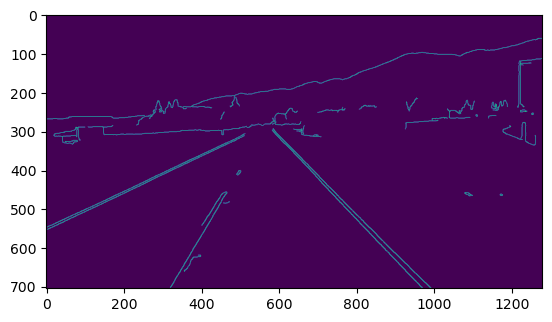

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny (image):
    gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny
    
image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny (lane_image)
plt.imshow(canny)
plt.show()

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny (image):
    gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny
    
def region_of_interest (image):
    height = image.shape[0]
    polygons = np.array([
        [(200, height ), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    return mask
    
image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny (lane_image)
cv2.imshow('result', region_of_interest(canny))
cv2.waitKey(0)

-1

# Cross sectional area

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny (image):
    gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny
    
def region_of_interest (image):
    height = image.shape[0]
    polygons = np.array([
        [(200, height ), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return mask
    
image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny (lane_image)
cv2.imshow('result', region_of_interest(canny))
cv2.waitKey(0)

-1

# UNDERSTAND BINARY NUMBER

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny (image):
    gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny
    
def region_of_interest (image):
    height = image.shape[0]
    polygons = np.array([
        [(200, height ), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image
    
image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny (lane_image)
cropped_image = region_of_interest(canny)
cv2.imshow('result', cropped_image)
cv2.waitKey(0)

-1

# DETECTION


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny (image):
    gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            print(line)
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image
    
def region_of_interest (image):
    height = image.shape[0]
    polygons = np.array([
        [(200, height ), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image
    
image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny_image = canny (lane_image)
cropped_image = region_of_interest(canny_image)
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5 )
line_image = display_lines(lane_image, lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
cv2.imshow('result', line_image)
cv2.waitKey(0)

[[704 418 927 641]]
[[704 426 766 490]]
[[320 703 445 494]]
[[592 304 704 416]]
[[617 333 660 377]]
[[767 493 969 702]]
[[585 301 704 424]]
[[402 542 455 460]]
[[660 373 754 467]]


-1

# COMBINE BOTH IMAGE

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny (image):
    gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            print(line)
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image
    
def region_of_interest (image):
    height = image.shape[0]
    polygons = np.array([
        [(200, height ), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image
    
image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny_image = canny (lane_image)
cropped_image = region_of_interest(canny_image)
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5 )
line_image = display_lines(lane_image, lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
cv2.imshow('result', combo_image)
cv2.waitKey(0)

[[704 418 927 641]]
[[704 426 766 490]]
[[320 703 445 494]]
[[592 304 704 416]]
[[617 333 660 377]]
[[767 493 969 702]]
[[585 301 704 424]]
[[402 542 455 460]]
[[660 373 754 467]]


-1

# THRESHOLD detected finally

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

""" def averaged_slope_intercept (image):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        print(parameters)

"""

def averaged_slope_intercept(image, lines):
    # Initialize variables to store slopes and intercepts
    left_fit = []
    right_fit = []
    
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    
    # Calculate average slope and intercept for left and right lines
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    
    left_line = create_line(image, left_fit_average)
    right_line = create_line(image, right_fit_average)
    
    return np.array([left_line, right_line])

def create_line(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1 * (3 / 5))
    x1 = int((y1 - intercept) / slope)
    x2 = int((y2 - intercept) / slope)
    return np.array([x1, y1, x2, y2])


def canny (image):
    gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            print(line)
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image
    
def region_of_interest (image):
    height = image.shape[0]
    polygons = np.array([
        [(200, height ), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image
    
image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny (lane_image)
cropped_image = region_of_interest(canny)
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5 )
#averaged_lines = averaged_slope_intercept(lane_image, lines)
#line_image = display_lines(lane_image, lines)
averaged_lines = averaged_slope_intercept(lane_image, lines)
line_image = display_lines(lane_image, averaged_lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)

cv2.imshow('result', combo_image)
cv2.waitKey(0)

[308 704 483 422]
[981 704 704 422]


-1

# Working with vedio feed


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

""" def averaged_slope_intercept (image):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        print(parameters)

"""

def averaged_slope_intercept(image, lines):
    # Initialize variables to store slopes and intercepts
    left_fit = []
    right_fit = []
    
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    
    # Calculate average slope and intercept for left and right lines
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    
    left_line = create_line(image, left_fit_average)
    right_line = create_line(image, right_fit_average)
    
    return np.array([left_line, right_line])

def create_line(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1 * (3 / 5))
    x1 = int((y1 - intercept) / slope)
    x2 = int((y2 - intercept) / slope)
    return np.array([x1, y1, x2, y2])


def canny (image):
    gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            print(line)
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 100, 0), 10)
    return line_image
    
def region_of_interest (image):
    height = image.shape[0]
    polygons = np.array([
        [(200, height ), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

def process_frame(frame):
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Apply Canny edge detection
    canny = cv2.Canny(gray, 50, 150)
    # Apply region of interest
    cropped_image = region_of_interest(canny)
    # Detect lines using HoughLinesP
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    # Create an image with the detected lines
    line_image = display_lines(frame, lines)
    # Combine the original image with the line image
    combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
    return combo_image

"""
image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny (lane_image)
cropped_image = region_of_interest(canny)
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5 )
#averaged_lines = averaged_slope_intercept(lane_image, lines)
#line_image = display_lines(lane_image, lines)
averaged_lines = averaged_slope_intercept(lane_image, lines)
line_image = display_lines(lane_image, averaged_lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
cv2.imshow('result', combo_image)
cv2.waitKey(0)
"""

"""
cap = cv2.VedioCapture("test2.mp4")
while (cap.isOpened()):
    _, frame = cap.read()
    canny = canny (frame)
    cropped_image = region_of_interest(canny)
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5 )
#averaged_lines = averaged_slope_intercept(lane_image, lines)
#line_image = display_lines(lane_image, lines)
    averaged_lines = averaged_slope_intercept(frame, lines)
    line_image = display_lines(frame, averaged_lines)
    combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
    cv2.imshow('result', combo_image)
    cv2.waitKey(1)
"""
# Open video file
cap = cv2.VideoCapture("test2.mp4")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Process the frame
    combo_image = process_frame(frame)
    # Display the result
    cv2.imshow('result', combo_image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[[800 514 895 609]]
[[361 681 492 434]]
[[791 493 933 626]]
[[518 376 548 324]]
[[ 939  653 1004  718]]
[[588 298 642 350]]
[[681 388 754 457]]
[[633 345 755 467]]
[[357 649 383 606]]
[[402 571 445 501]]
[[ 707  420 1006  719]]
[[328 693 354 649]]
[[458 479 528 358]]
[[748 452 850 548]]
[[506 404 537 351]]
[[378 612 431 525]]
[[589 305 629 342]]
[[660 367 704 409]]
[[ 707  420 1006  719]]
[[791 493 933 626]]
[[356 690 504 411]]
[[588 298 642 350]]
[[388 598 472 453]]
[[670 377 743 446]]
[[633 345 755 467]]
[[751 455 849 547]]
[[500 406 549 324]]
[[449 494 500 408]]
[[359 646 414 552]]
[[513 391 538 349]]
[[685 392 771 473]]
[[585 301 641 354]]
[[327 693 354 649]]
[[712 417 800 500]]
[[723 436 914 627]]
[[673 385 775 487]]
[[345 708 420 568]]
[[825 525 957 649]]
[[392 589 468 459]]
[[460 494 523 372]]
[[458 478 548 323]]
[[760 463 935 627]]
[[593 304 644 351]]
[[604 318 651 361]]
[[867 579 943 655]]
[[348 666 392 588]]
[[379 646 476 462]]
[[646 351 693 398]]
[[ 943  636 1007  696]]
[[71

In [3]:
import cv2
import numpy as np

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), ( 0, 0, 255), 10)
    return line_image

def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([[(200, height), (1100, height), (550, 250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

def process_frame(frame):
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Apply Canny edge detection
    canny = cv2.Canny(gray, 50, 150)
    # Apply region of interest
    cropped_image = region_of_interest(canny)
    # Detect lines using HoughLinesP
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    # Create an image with the detected lines
    line_image = display_lines(frame, lines)
    # Combine the original image with the line image
    combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
    return combo_image

# Open video file
cap = cv2.VideoCapture("test2.mp4")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Process the frame
    combo_image = process_frame(frame)
    # Display the result
    cv2.imshow('result', combo_image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


# Moving with Advance section of feedback for finding lanes